In [1]:
import json

## Filter items that have been observed for the first time in year 2020 or later

In [2]:
def filter_items_by_year(data: dict, year: int) -> dict:
    """
    Filters itmes that have been observed for the first time in the specified year or later
    """
    
    filter = False
    if int(data['details']['Date First Available'][-4:]) >= year:
        filter = True

    return filter

In [3]:
with open('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics.jsonl', 'r') as fp:
    with open('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics_2022_2023.jsonl', 'a', encoding='utf-8') as fp_out:
        with open('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics_2022_2023_no_date.jsonl', 'a', encoding='utf-8') as fp_out_no_date:
            i=0
            for line in fp:
                data = json.loads(line.strip())
                try:
                    filter = filter_items_by_year(data, 2022)
                    if filter:
                        json.dump(data, fp_out)
                        fp_out.write('\n')
                        fp_out.flush()
                except:
                    json.dump(data, fp_out_no_date)
                    fp_out_no_date.write('\n')
                    fp_out_no_date.flush()
                i += 1
                if i % 10000 == 0:
                    print("Processed {i} lines".format(i=i))

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin

## Split the items into two categories: "has main category", "does not have main category"

In [4]:
def filter_category(data: dict) -> dict:
    """"
    Splits the iems into two categories: "has main category", "does not have main category
    """
    filter = False
    if data['main_category'] == None:
        filter = True
    
    return filter

In [5]:
with open('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics_2022_2023.jsonl', 'r') as fp:
    with open('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics_2022_2023_with_cat.jsonl', 'a', encoding='utf-8') as fp_out:
        with open('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics_2022_2023_no_cat.jsonl', 'a', encoding='utf-8') as fp_out_no_cat:
            i=0
            for line in fp:
                data = json.loads(line.strip())
                if not filter_category(data):
                    json.dump(data, fp_out)
                    fp_out.write('\n')
                    fp_out.flush()
                else:
                    json.dump(data, fp_out_no_cat)
                    fp_out_no_cat.write('\n')
                    fp_out_no_cat.flush()
                i += 1
                if i % 10000 == 0:
                    print("Processed {i} lines".format(i=i))

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines


## Explore distributions by categories

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_json('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics_2022_2023_with_cat.jsonl', lines=True)

In [7]:
df.head(3)

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Amazon Home,"Outer Space Planets Stickers(50Pcs),Planetary ...",4.5,50,[PROFESSIONAL STICKER SHOP.There are 50 differ...,"[Features:, - Clear picture and exquisite prin...",3.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Watch Before Buying! Huge Waterpro...,Affoto,"[Electronics, Computers & Accessories, Laptop ...","{'Brand': 'Affoto', 'Color': 'Outer Space', 'S...",B0BPLX8B2K,NaN,NaN,NaN
1,Computers,"Gateway 15.6"" FHD Ultra Slim Budget Notebook, ...",4.1,15,"[【Processor】4 Core, 4 Threads, 4MB Cache, up t...","[Processor:, Intel® Pentium® Silver N5030 Proc...",189.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Watch before you order ', 'url': '...",Gateway,"[Electronics, Computers & Accessories, Compute...",{'Standing screen display size': '15.6 Inches'...,B0BYBG1PPD,NaN,NaN,NaN
2,Cell Phones & Accessories,May Chen Compatible with MacBook Pro 16 inch C...,4.5,649,[【 COMPATIBLE WITH 】 Designed to Fits Perfectl...,[May Chen High Quality Plastic Hard Shell Case...,26.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'MOSISO Plastic Hard Shell Compati...,May Chen,"[Electronics, Computers & Accessories, Laptop ...","{'Standing screen display size': '16 Inches', ...",B0822SL7JX,NaN,NaN,NaN


In [8]:
len(df)

103993

## Items with at least 100 ratings

In [11]:
len(df[df['rating_number'] > 100])

17162

In [34]:
df_ratings_100 = df[df['rating_number'] > 100]

### Check for missing values in each column of df_ratings_100

In [ ]:
missing_values = df_ratings_100.isnull().sum()
print(missing_values)

main_category          0
title                  0
average_rating         0
rating_number          0
features               0
description            0
price               3153
images                 0
videos                 0
store                 23
categories             0
details                0
parent_asin            0
bought_together    17162
subtitle           17162
author             17162
dtype: int64


## Count main_category entries and average rating per category based on all reviews

C:\Users\dariu\AppData\Local\Temp\ipykernel_14984\4099552442.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g['average_rating'] * g['rating_number']).sum() / g['rating_number'].sum())


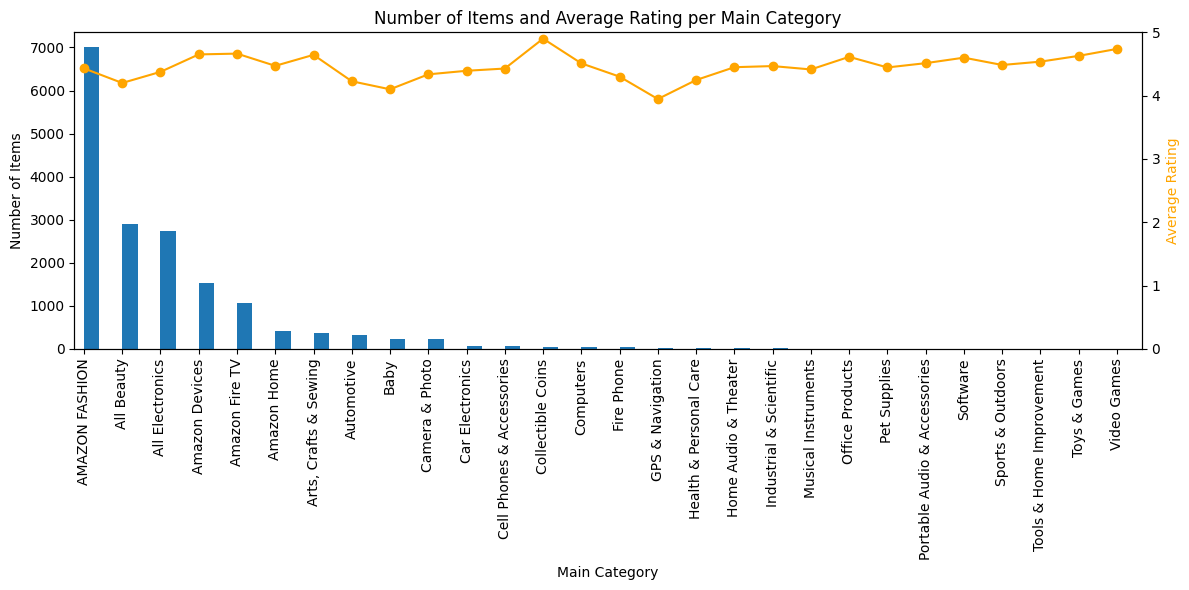

In [40]:
# Combine count and average rating per main_category
category_counts = df_ratings_100['main_category'].value_counts()
# Weighted average: sum of all ratings in the category / total number of ratings in the category
weighted_avg = (
    df_ratings_100
    .groupby('main_category')
    .apply(lambda g: (g['average_rating'] * g['rating_number']).sum() / g['rating_number'].sum())
)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for counts
category_counts.plot(kind='bar', ax=ax1, position=0, width=0.4)
ax1.set_ylabel('Number of Items')
ax1.set_xlabel('Main Category')

# Line plot for average rating
ax2 = ax1.twinx()
weighted_avg.plot(kind='line', color='orange', marker='o', ax=ax2)
ax2.set_ylabel('Average Rating', color='orange')
ax2.set_ylim(0, 5)

plt.title('Number of Items and Average Rating per Main Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribution of ratings

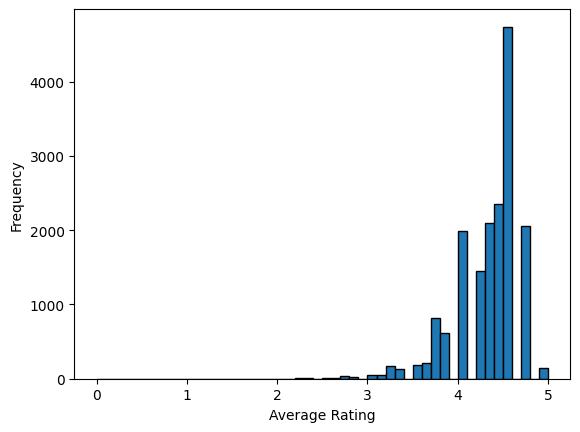

In [13]:
import numpy as np

bin_edges = np.linspace(0, 5, 51)  # 50 bins, includes both 0 and 5
df_ratings_100['average_rating'].plot(kind='hist', bins=bin_edges, edgecolor='black')
plt.xlabel('Average Rating')
plt.show()

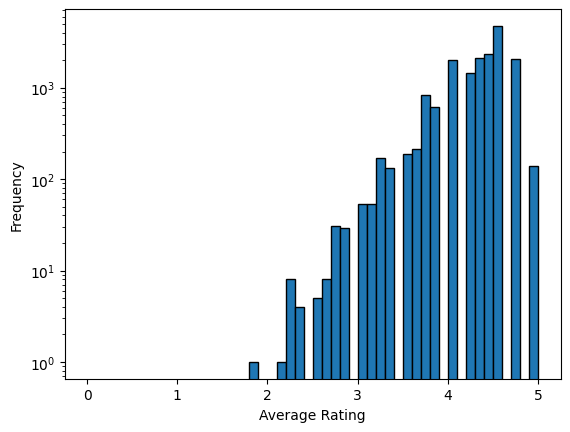

In [14]:
df_ratings_100['average_rating'].plot(kind='hist', bins=bin_edges, edgecolor='black')
plt.xlabel('Average Rating')
plt.yscale('log')
plt.show()

## Distribution by Date First Available

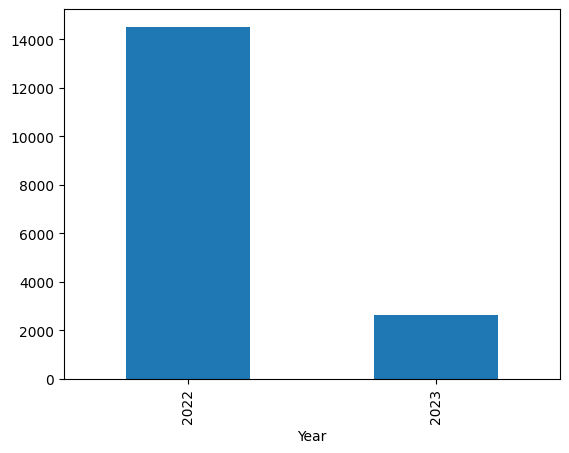

In [30]:
first_date = df_ratings_100['details'].apply(lambda x: x.get('Date First Available')[-4:]).value_counts()
first_date.plot(kind='bar')
plt.xlabel('Year')
plt.show()

## Correlation matrix for numeric columns

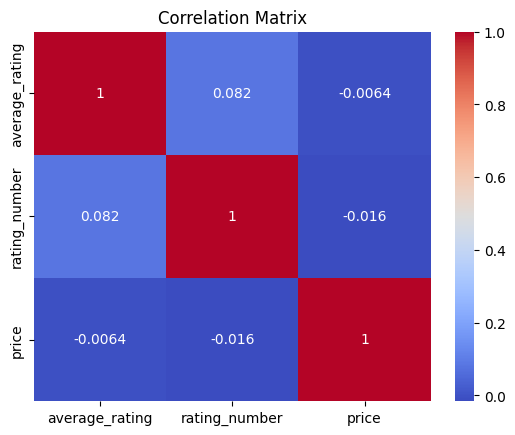

In [ ]:
import seaborn as sns
# Ensure only numeric columns are used
numeric_df = df_ratings_100.select_dtypes(include='number')
corr = numeric_df.corr()

# Drop rows and columns with all NaN values (if any)
corr = corr.dropna(axis=0, how='all')  # drop all-NaN rows
corr = corr.dropna(axis=1, how='all')  # drop all-NaN columns

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

No correlation between average_rating and rating_number or price.

## Identify popular items and categories based on review counts

### Identify top 10 most reviewed items

In [ ]:
top_items = df_ratings_100.sort_values('rating_number', ascending=False).head(10)
print("Top 10 most reviewed items:")
display(top_items[['parent_asin', 'title', 'main_category', 'rating_number']])

Top 10 most reviewed items:


,parent_asin,title,main_category,rating_number
3428,B07PWCN4LC,Syntech USB C to USB Adapter Pack of 2 USB C M...,Computers,140739
4338,B0BRZPCQNJ,SanDisk 64GB 2-Pack Ultra microSDXC UHS-I Memo...,Computers,121509
71430,B09XRCVYGC,OnePlus Bullets Wireless Z2 Bluetooth 5.0 in E...,All Electronics,121313
33537,B09NM497ZR,"AINOPE USB C Cable 0.5ft, 3.1A Type C Charger ...",All Electronics,86695
62962,B0CC2FVRJW,Xiaomi Redmi Watch 3 Active Smart Watch Fitnes...,Cell Phones & Accessories,83594
3684,B0BR3MLGZZ,Stylus Pen for iPad 9th&10th Generation-2X Fas...,All Electronics,81442
30812,B08R5N6VQ5,Wyze Cam Pan 1080p Pan/Tilt/Zoom Indoor Smart ...,Camera & Photo,76629
10281,B0B4DCFYF9,"etguuds [2-Pack,2ft] USB C Cable 3A Fast Charg...",All Electronics,73924
5630,B0BHMN1T7B,Western Digital 500GB WD Blue SA510 SATA Inter...,Computers,67681
18091,B0BWVDRR6L,Toshiba Canvio Basics 1TB Portable External Ha...,Computers,66639


### Identify top 10 categories by total review count

In [ ]:
category_review_counts = df_ratings_100.groupby('main_category')['rating_number'].sum().sort_values(ascending=False).head(10)
print("Top 10 categories by total review count:")
display(category_review_counts)


Top 10 categories by total review count:


main_category
All Electronics              6272476
Computers                    3035596
Cell Phones & Accessories    1975180
Camera & Photo                984585
Industrial & Scientific       694916
Home Audio & Theater          399551
AMAZON FASHION                156250
Tools & Home Improvement      148531
Office Products               143063
Amazon Home                   135300
Name: rating_number, dtype: int64

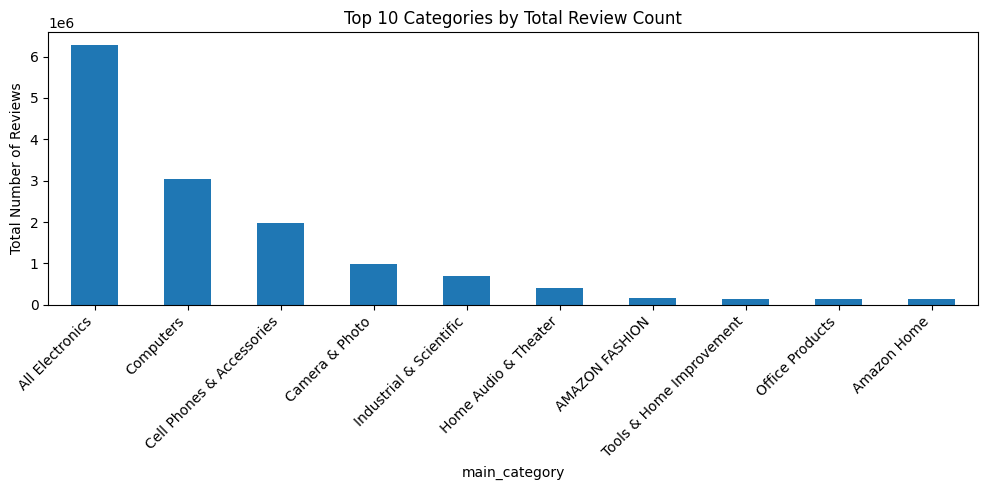

In [29]:
# Plot top 10 categories by total review count
category_review_counts.plot(
    kind='bar',
    figsize=(10, 5),
    title='Top 10 Categories by Total Review Count'
)
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Random sampling

In [16]:
df_sample_1000 = df_ratings_100.sample(n=1000, random_state=42)

In [17]:
len(df_sample_1000)

1000

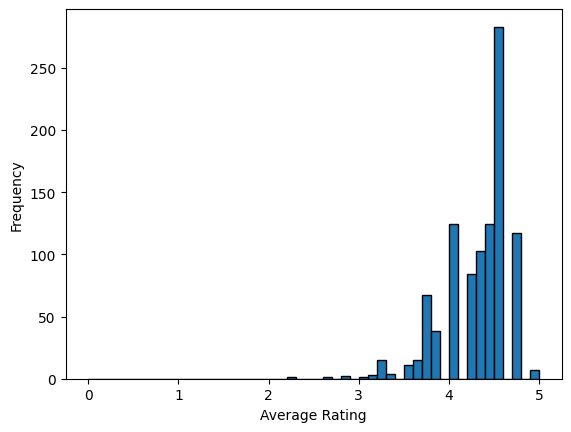

In [18]:
bin_edges = np.linspace(0, 5, 51)  # 50 bins, includes both 0 and 5
df_sample_1000['average_rating'].plot(kind='hist', bins=bin_edges, edgecolor='black')
plt.xlabel('Average Rating')
plt.show()

## Export data and sample

In [19]:
df_ratings_100.to_json('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl', orient='records', lines=True)

In [20]:
df_sample_1000.to_json('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl', orient='records', lines=True)

## Extract ratings that match sampled data

In [46]:
df_ratings_100 = pd.read_json('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl', lines=True)
df_sample_1000 = pd.read_json('C:/CODE/ai_engineering_bootcamp_data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl', lines=True)

In [23]:
len(df_ratings_100['parent_asin'].values)

17162

In [25]:
len(df_sample_1000['parent_asin'].values)

1000

In [21]:
with open("C:/CODE/ai_engineering_bootcamp_data/Electronics.jsonl", 'r') as fp:
    with open("C:/CODE/ai_engineering_bootcamp_data/Electronics_2022_2023_with_category_ratings_100.jsonl", 'a') as fp_out:
        id_set = set(df_ratings_100['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_set:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 10000 == 0:
                print("Processed {i} lines".format(i=i))


Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin

In [22]:
with open("C:/CODE/ai_engineering_bootcamp_data/Electronics_2022_2023_with_category_ratings_100.jsonl", 'r') as fp:
    with open("C:/CODE/ai_engineering_bootcamp_data/Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", 'a') as fp_out:
        id_set = set(df_sample_1000['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_set:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print("Processed {i} lines".format(i=i))

Processed 100000 lines
Processed 200000 lines
Processed 300000 lines
Processed 400000 lines
Processed 500000 lines
Processed 600000 lines
Processed 700000 lines
Processed 800000 lines
Processed 900000 lines
Processed 1000000 lines
Processed 1100000 lines
Processed 1200000 lines
Processed 1300000 lines
Processed 1400000 lines
Processed 1500000 lines
Processed 1600000 lines
Processed 1700000 lines
